# Polynomial Regression 

<br>

We can use a liinear model to fit non linear data. A simple way to do this is to add powers of each features as new features, then train a linear model on this extended set of features. This is called _Polynomial Regression._

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m,1) - 3 # Creates array of given shape and populate it with random samples with uniform distribution
y = 0.5 * X**2 + X+2+np.random.randn(m,1) # Quadratic Equation
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
# Straight line will never fit this data properly. 
# Scikit learn's PolynomialFeatures class to transform our training data, adding the square of each feature in the trainig set as new features


from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.28672147])

In [3]:
X_poly[0]

array([1.28672147, 1.65565215])

X_poly now has original features of X and square of this feature.

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_


(array([2.02297417]), array([[1.01681918, 0.51639906]]))

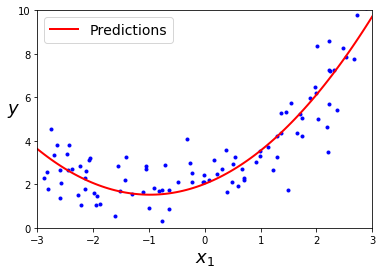

In [5]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
# numpy.linspace returns evenly spaced numbers over a specified interval. 
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Learning Curves

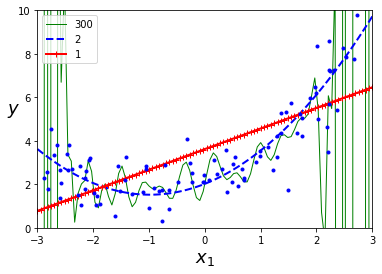

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

If the model is Linear then for the Non linear data it will be underfitting (1 and red) 
If the model is High degree polynomial then for the Non linear data it will be overfitting (300 gree)

So how can we tell our model is underfit or overfit ?

* Using Cross validation to get an estimator of a models generalization performance. 
    * If model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting.
    * If model perfoms poorly on both training data and generalization then it is underfitting.
    
Another way is _Learning Curves_: these are the plots of the model's performance on the training set and the validation set as a function of the training set size. To generate plots, simply train the model several times on different sized subsets of the training set.




In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size =0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict  = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label = "train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label = "val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14) 

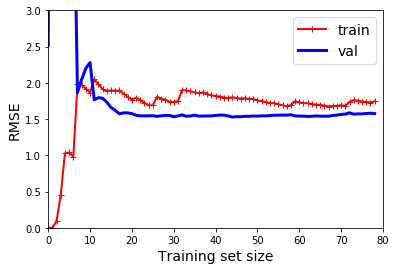

In [8]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show() 

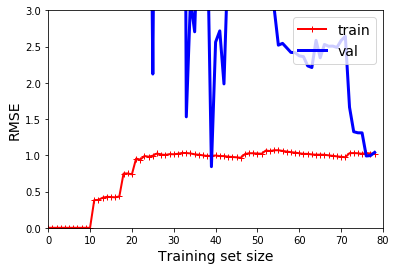

In [9]:
# Learning curves of a 10th degree polynomial model

from sklearn.pipeline import Pipeline

polynomial_Regression = Pipeline((
                    ("Poly_features",PolynomialFeatures(degree=10, include_bias = False)),
                    ("lin_reg", LinearRegression()),
))

plot_learning_curves(polynomial_Regression, X,y)
plt.axis([0, 80, 0, 3])
plt.show()

### The Bias/Variance Tradeoff

Models generalization error can be expressed as the sum of three very different errors:

__Bias :__ This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
<br>
__Variance:__ This part is due to the models excessive sensitivity to small variations in the training data. A model with degree of freedom is likely to have high variance and thus it overfit the training data.
<br>
__Irreducible Error:__ This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data.
<br>

Increasing a model's complexity will typically increases its variance and reduce its bias. COnversely, reducing a model's complexity increases its bias and reduces its vairance. This is why it is called a tradeoff.

## Regularized Linear Models :

A good way to reduce the overfitting is to regularize the model the fewer degrees of freedom it has, the harder it will be for it to overfit the data.

For Linear model, regularization si typically by constraining the ewights of the model. 

Different ways to constrain the weights:

* _Ridge Regression_
* _Lasso Regression_
* _Elastic Net_


### Ridge Regression : ( _Tikhonov regularization_)

It is a regularized version of Linear Regression : a regularization term equal to  $\alpha \sum_{i=1}^n \theta_i^2$ is added to the cost funtion. This force the learning algorithm to not only fit the data but also keep the model weights as small as possible. 

__Note:__ Regularization term should only be added to the cost function during the training. Once the model is trained, to evaluate the model's performance using the unregularized performace measure.
<br><br>

The hyperparameter $\alpha$ controls how much you want to regularize the model.

If $\alpha$ = 0 : then RidgeRegression is just Linear Regression. <br>
If $\alpha$ is very large:  then RidgeRegression is upto very close to zero and the result is a flat line going through data's mean.

$$J(\theta) = MSE(\theta) +\alpha \sum_{i=1}^n \theta_i^2$$

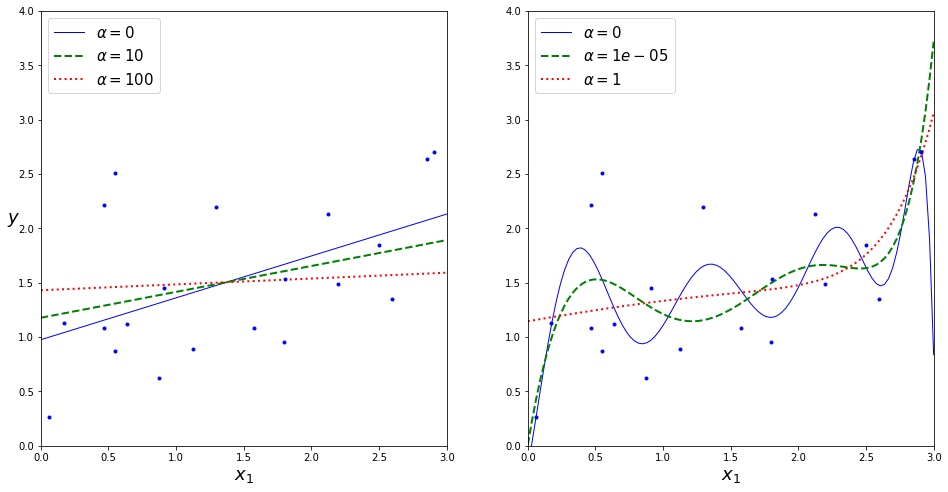

In [10]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(16,8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [11]:
from sklearn.linear_model import Ridge

ridge_Reg = Ridge(alpha=1,solver="cholesky")
ridge_Reg.fit(X,y)
ridge_Reg.predict([[1.5]])


array([[1.55071465]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2") 
# specifying l2 indicates that you want  SGD to add a regularization term to the cost function equal to 
# half the square of the l2 norm of the weight vector
sgd_reg.fit(X,np.ravel(y))
sgd_reg.predict([[1.5]])

array([1.12795912])

### Lasso Regression 

LASSO : Least Shrinkage and Selection Operator Regression. It is another regularizede term to the cost function of Linear Regression. It adds a regularization term to the cost function, but it uses the $l_1$ norm of the weight vector instead of half the square of $l_2$ norm.

_Lasso Regression of Cost function_

$$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i|$$

Lassor regression automatically performs feature selection and outputs a sparse model. An important charateristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features 

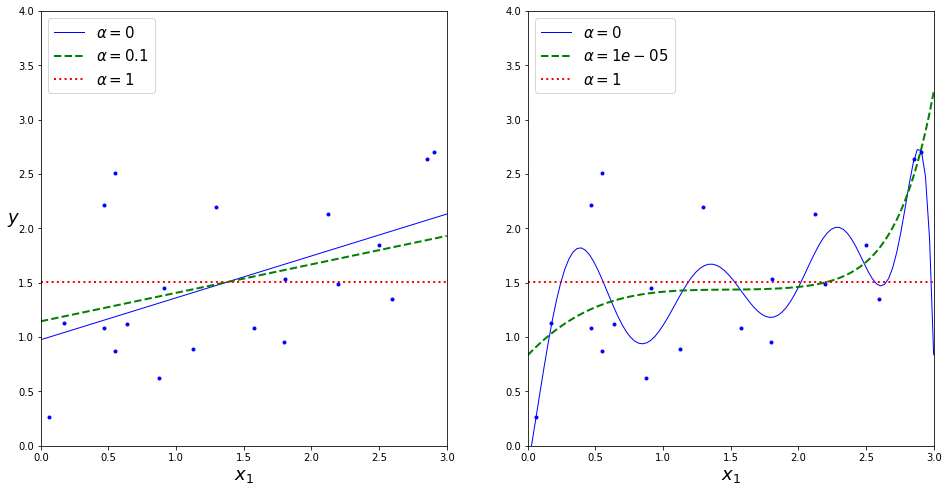

In [14]:
from sklearn.linear_model import Lasso

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(16,8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()